# Review
Hi, my name is Dmitry and I will be reviewing your project.

You can find my comments in colored markdown cells:

<div class="alert alert-success">
    If everything is done succesfully.
</div>

<div class="alert alert-warning">
    If I have some (optional) suggestions, or questions to think about, or general comments.
</div>

<div class="alert alert-danger">
    If a section requires some corrections. Work can't be accepted with red comments.
</div>

Please don't remove my comments, as it will make further review iterations much harder for me.

Feel free to reply to my comments or ask questions using the following template:

<div class="alert alert-info">
    For your comments and questions.
</div>

First of all, thank you for turning in the project! You did an excellent job overall (I especially liked how you dealt with missing values, great work!), there are just a couple of small problems that need to be fixed before the project can be accepted. Good luck!

<div class="alert alert-info">
    Dmitry, thank you for your comments!
</div>

<div class="alert alert-success">
    <b>V2.</b>
    Thanks for taking the time to improve the project and leaving comments! Now the project is accepted, and you can move on to the next sprint. Keep up the good work!
</div>

# Goal
Optimize the gold production (flotation + purification)

# Project instructions
<font size="3">**Section 1**</font>
1. Prepare the data
- Open the files and look into the data.
- Check that recovery is calculated correctly. Using the training set, calculate recovery for the rougher.output.recovery feature. Find the MAE between your calculations and the feature values. Provide findings.
- Analyze the features not available in the test set. What are these parameters? What is their type?
- Perform data preprocessing. <br>
<font size="3">**Section 2**</font>
2. Analyze the data
- Take note of how the concentrations of metals (Au, Ag, Pb) change depending on the purification stage.
- Compare the feed particle size distributions in the training set and in the test set. If the distributions vary significantly, the model evaluation will be incorrect.
- Consider the total concentrations of all substances at different stages: raw feed, rougher concentrate, and final concentrate. Do you notice any abnormal values in the total distribution? If you do, is it worth removing such values from both samples? Describe the findings and eliminate anomalies. <br>
<font size="3">**Section 3**</font>
3. Build the model
- Write a function to calculate the final sMAPE value.
- Train different models. Evaluate them using cross-validation. Pick the best model and test it using the test sample. Provide findings.

In [203]:
# import libraries

import pandas as pd
import numpy as np
#from math import isnan
#import seaborn as sns
import matplotlib.pyplot as plt
from scipy import interpolate

from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

from sklearn.dummy import DummyRegressor

# Section 1
1. Prepare the data
- [x] Open the files and look into the data.
- [x] Check that recovery is calculated correctly. Using the training set, calculate recovery for the rougher.output.recovery feature. Find the MAE between your calculations and the feature values. Provide findings.
- [x] Analyze the features not available in the test set. What are these parameters? What is their type?
- [x] Perform data preprocessing

**- [x] Open the files and look into the data.**

In [204]:
# open files in local machine or in server

try:
    df_train = pd.read_csv("datasets/gold_recovery_train.csv")
    df_test = pd.read_csv("datasets/gold_recovery_test.csv")
    df_full = pd.read_csv("datasets/gold_recovery_full.csv")
except:
    df_train = pd.read_csv("/datasets/gold_recovery_train.csv")
    df_test = pd.read_csv("/datasets/gold_recovery_test.csv")
    df_full = pd.read_csv("/datasets/gold_recovery_full.csv")    

In [205]:
# check if we correctly imported the file (tabulations): train dataset

df_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [206]:
# check if we correctly imported the file (tabulations): test dataset

df_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [207]:
# check if we correctly imported the file (tabulations): full dataset

df_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [208]:
# get info about train, test and full datasets

df_train.info()
print('\nType of column date:',type(df_train['date'][0]),'\n')

df_test.info()
print('\nType of column date:',type(df_train['date'][0]),'\n')

df_full.info()
print('\nType of column date:',type(df_train['date'][0]))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

**Notice:**
1. Date is not a date-type. It is a string.
2. All other columns are float type (shouldn't change type).
3. There are a lot of missing N/A-values, number of those differ from column to column.

In [209]:
# check if there are duplicates in datasets

print('There are {:} duplicates in train dataset'.format(sum(df_train.duplicated())))
print('There are {:} duplicates in test dataset'.format(sum(df_test.duplicated())))
print('There are {:} duplicates in full dataset'.format(sum(df_full.duplicated())))

There are 0 duplicates in train dataset
There are 0 duplicates in test dataset
There are 0 duplicates in full dataset


In [210]:
# rename columns to avoid dots in names (instead of them use '_')
# it is reall helpfull, cause we could directly address the name of column, for example in query

cols = df_train.columns
cols = cols.map(lambda x: x.replace('.', '_'))
df_train.columns = cols

cols = df_test.columns
cols = cols.map(lambda x: x.replace('.', '_'))
df_test.columns = cols

cols = df_full.columns
cols = cols.map(lambda x: x.replace('.', '_'))
df_full.columns = cols

In [211]:
# add target values from full dataset to test dataset (for comfort)

df_test = df_test.merge(df_full[['date', 'final_output_recovery', 'rougher_output_recovery']], 
                        how='left', on='date')

<div class="alert alert-success">
    Great, you loaded the data and inspected it!
</div>

**- [x] Check that recovery is calculated correctly. Using the training set, calculate recovery for the rougher.output.recovery feature. Find the MAE between your calculations and the feature values. Provide findings.**

<img src="https://pictures.s3.yandex.net/resources/Recovery_1576238822_1589899219.jpg" alt="Drawing" style="width: 400px;"/>
where: <br>
C — share of gold in the concentrate right after flotation (for finding the rougher concentrate recovery)/after purification (for finding the final concentrate recovery) <br>
F — share of gold in the feed before flotation (for finding the rougher concentrate recovery)/in the concentrate right after flotation (for finding the final concentrate recovery) <br>
T — share of gold in the rougher tails right after flotation (for finding the rougher concentrate recovery)/after purification (for finding the final concentrate recovery)

In [212]:
# save variables to simplify the formula

C = df_train['rougher_output_concentrate_au']
F = df_train['rougher_input_feed_au']
T = df_train['rougher_output_tail_au']

median: 85.24
quantile 0.05-0.95: 66.01-94.60


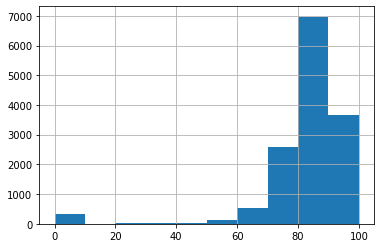

In [213]:
# plot histogram rougher_output_recovery in train dataset
# calculate median and quantiles (not necessary, but interesting)

df_train['rougher_output_recovery'].hist(figsize=(6,4))
print('median: {:.2f}'.format(df_train['rougher_output_recovery'].median()))
print('quantile 0.05-0.95: {:.2f}-{:.2f}'.format(
                    df_train['rougher_output_recovery'].quantile(0.05),
                    df_train['rougher_output_recovery'].quantile(0.95)))

**Notice:**
1. *rougher_output_recovery* changes between 0-100%
2. median: 85.24
3. quantile 0.05-0.95: 66.01-94.60
3. There are ~300 zero values.

**note:** if (a) F==0 or (b) C-T == 0 in formula then Recovery will be undefined, so we assigned N/A-value. <br>
**note:** if (c) Recovery > 100% or (d) Recovery < 0% then Recovery will be undefined, so we assigned N/A-value. <br>

In [214]:
# before calculation let's look through what this conditions mean
# it is not necessary, but it is helpfull for understanding Recovery coefficient

# (a) F==0 
df_train.query('rougher_input_feed_au == 0')

,date,final_output_concentrate_ag,final_output_concentrate_pb,final_output_concentrate_sol,final_output_concentrate_au,final_output_recovery,final_output_tail_ag,final_output_tail_pb,final_output_tail_sol,final_output_tail_au,...,secondary_cleaner_state_floatbank4_a_air,secondary_cleaner_state_floatbank4_a_level,secondary_cleaner_state_floatbank4_b_air,secondary_cleaner_state_floatbank4_b_level,secondary_cleaner_state_floatbank5_a_air,secondary_cleaner_state_floatbank5_a_level,secondary_cleaner_state_floatbank5_b_air,secondary_cleaner_state_floatbank5_b_level,secondary_cleaner_state_floatbank6_a_air,secondary_cleaner_state_floatbank6_a_level
99,2016-01-19 03:00:00,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,...,13.985160,-799.601232,12.036072,-603.234250,9.974968,-497.092974,7.953962,-499.698442,11.941642,-598.541756
100,2016-01-19 04:00:00,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,...,14.034374,-799.600946,12.040491,-623.446329,9.898782,-499.623262,7.979302,-500.283366,11.959950,-600.998301
101,2016-01-19 05:00:00,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,...,13.943929,-799.600659,12.040238,-638.103348,9.956309,-499.791870,7.978806,-500.202026,11.987839,-600.302819
102,2016-01-19 06:00:00,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,...,14.040873,-799.600372,12.030771,-641.310327,9.966952,-499.842458,8.053455,-499.588522,11.987935,-600.523057
103,2016-01-19 07:00:00,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,...,13.972371,-799.600085,12.021058,-641.457227,10.033820,-501.291438,7.985956,-499.934267,12.027556,-600.108918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12052,2018-01-30 03:59:59,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,...,20.005303,-500.893527,14.922286,-500.230461,10.909829,-500.314837,9.007956,-500.153163,10.988968,-500.387261
12053,2018-01-30 04:59:59,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,...,19.962859,-655.489381,14.956567,-524.758657,10.961487,-500.066426,9.004925,-500.040902,10.961121,-500.023096
12054,2018-01-30 05:59:59,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,...,20.017100,-523.801393,15.013965,-499.995375,10.991333,-499.941268,9.062215,-499.992738,10.996987,-499.871678
12055,2018-01-30 06:59:59,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,...,19.947963,-521.792599,15.041185,-500.303435,10.980523,-500.095725,9.041985,-499.916563,11.010581,-500.083532


Mean rougher_input_feed_rate when rougher_input_feed_au is zero: 28.52


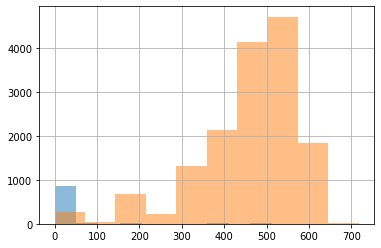

In [215]:
# check what values of <rougher_input_feed_rate> in this observations(rows) when F==0

df_train.query('rougher_input_feed_au == 0')['rougher_input_feed_rate'].hist(alpha=0.5)
df_train.query('rougher_input_feed_au != 0')['rougher_input_feed_rate'].hist(alpha=0.5)

print('Mean rougher_input_feed_rate when rougher_input_feed_au is zero: {:.2f}'.format(
                df_train.query('rougher_input_feed_au == 0')['rougher_input_feed_rate'].mean()))


**So...** When *rougher_input_feed_au* is zero (F==0) *rougher_input_feed_rate* is very low (mean 28.52). We assume that flotation machine doesn't work (no source material) and so can't produce the gold. 

In [216]:
# (b) C==T 
# rougher_output_concentrate_au == rougher_output_tail_au
df_train.query('rougher_output_concentrate_au == rougher_output_tail_au')

,date,final_output_concentrate_ag,final_output_concentrate_pb,final_output_concentrate_sol,final_output_concentrate_au,final_output_recovery,final_output_tail_ag,final_output_tail_pb,final_output_tail_sol,final_output_tail_au,...,secondary_cleaner_state_floatbank4_a_air,secondary_cleaner_state_floatbank4_a_level,secondary_cleaner_state_floatbank4_b_air,secondary_cleaner_state_floatbank4_b_level,secondary_cleaner_state_floatbank5_a_air,secondary_cleaner_state_floatbank5_a_level,secondary_cleaner_state_floatbank5_b_air,secondary_cleaner_state_floatbank5_b_level,secondary_cleaner_state_floatbank6_a_air,secondary_cleaner_state_floatbank6_a_level


**So...** For this dataset it is unnecessary to use this condition (C==T); but to make this code more general, we will use it.

In [217]:
# calculate RECOVERY, manually assign NaN-value in case (a), (b), (c) and (d) (see previous comments)
# if we do it in matrix record (like recovery = C*(F-T)/...*100%) then in some rows there will be Inf-values.
#    to escape them I calculate parameter in cycle (it is slower, but without surprises) 

def Recovery_calculator(C_calc, F_calc, T_calc):
    Recovery_list = []
    for k in range(len(C_calc)):
        if F_calc[k] == 0 or (C_calc-T_calc)[k] == 0 or \
                    C_calc[k] * (F_calc[k] - T_calc[k]) / F_calc[k] / (C_calc[k] - T_calc[k]) > 1. or \
                    C_calc[k] * (F_calc[k] - T_calc[k]) / F_calc[k] / (C_calc[k] - T_calc[k]) < 0.:            
            Recovery_list.append(np.nan)
        else:
            Recovery_list.append(C_calc[k] * (F_calc[k] - T_calc[k]) / F_calc[k] / (C_calc[k] - T_calc[k]) * 100.)
    return Recovery_list

# save calculations in dataframe train
df_train['rougher_calculationML_recovery'] = Recovery_calculator(C, F, T)

In [218]:
# print number of N/A values in calculated recovery

print('Number of N/A values in calculated recovery: {:}'.format(
            (df_train['rougher_calculationML_recovery'].isnull()).sum()))

# check for errors in calculated recovery (infinite values)
print('Number of Inf values in calculated recovery: {:}'.format(
            df_train['rougher_calculationML_recovery'].isin([np.inf, -np.inf]).sum()))

# print number of N/A values in recovery (train set)
print('Number of N/A values in dataset recovery: {:}'.format(
            (df_train['rougher_output_recovery'].isnull()).sum()))

Number of N/A values in calculated recovery: 2573
Number of Inf values in calculated recovery: 0
Number of N/A values in dataset recovery: 2573


In [219]:
# if all N/A-values are in the same row print 0

(df_train[df_train['rougher_calculationML_recovery'].isnull()].index != \
df_train[df_train['rougher_output_recovery'].isnull()].index).sum()

0

In [220]:
# find the MAE between calculations and the feature values
print('MAE:',mean_absolute_error(df_train['rougher_output_recovery'].dropna(),
                    df_train['rougher_calculationML_recovery'].dropna()))


MAE: 1.0512313043960013e-14


**So...**
1. We have calculated rougher_output_recovery using formula. We assign N/A-values in 4 cases: if <br>
(a) F==0,
(b) C-T == 0
(c) Recovery > 100%
(d) Recovery < 0%. 
2. These N/A values have the same index as they are in the dataset parameter rougher_output_recovery.
3. Number of N/A values in calculated recovery: 2573. Later in this section we should remove them (we can't use N/A-values to train the model).
4. MAE is extremely low (deviation of computational error), so we can surely claim that the rougher_output_recovery in the dataframe is correct, we can calculate it.

<div class="alert alert-success">
    Recovery data was validated successfully!
</div>

**- [x] Analyze the features not available in the test set. What are these parameters? What is their type?**

In [221]:
# number of those features

len(df_train.columns) - len(df_test.columns) - 1 # substracted 1 because we added one column in train dataset (recovery)

32

In [222]:
# determine the features not available in the test set
# save it in list

features_not_in_test = []
for item in df_train.columns:   # cycle over columns in train
    if item not in df_test.columns: # if any column not in test dataset,
        features_not_in_test.append(item) # it append to the reserve list

In [223]:
# print it
# type of all of those columns is float as it was mentioned above

features_not_in_test

['final_output_concentrate_ag',
 'final_output_concentrate_pb',
 'final_output_concentrate_sol',
 'final_output_concentrate_au',
 'final_output_tail_ag',
 'final_output_tail_pb',
 'final_output_tail_sol',
 'final_output_tail_au',
 'primary_cleaner_output_concentrate_ag',
 'primary_cleaner_output_concentrate_pb',
 'primary_cleaner_output_concentrate_sol',
 'primary_cleaner_output_concentrate_au',
 'primary_cleaner_output_tail_ag',
 'primary_cleaner_output_tail_pb',
 'primary_cleaner_output_tail_sol',
 'primary_cleaner_output_tail_au',
 'rougher_calculation_sulfate_to_au_concentrate',
 'rougher_calculation_floatbank10_sulfate_to_au_feed',
 'rougher_calculation_floatbank11_sulfate_to_au_feed',
 'rougher_calculation_au_pb_ratio',
 'rougher_output_concentrate_ag',
 'rougher_output_concentrate_pb',
 'rougher_output_concentrate_sol',
 'rougher_output_concentrate_au',
 'rougher_output_tail_ag',
 'rougher_output_tail_pb',
 'rougher_output_tail_sol',
 'rougher_output_tail_au',
 'secondary_cleane

**So...**
1. There are: final_output_..., secondary_cleaner_output_..., primary_cleaner_output_..., rougher_output_... and rougher_calculation_...
2. Some parameters are not available because they were measured and/or calculated much later. That's why, some of the features that are present in the training set may be absent from the test set. The test set also doesn't contain targets.
3. Type float.
4. We need to find the share of gold in the concentrate and the tails to predict target features

<div class="alert alert-success">
    Yep, you are right!
</div>

**- [x] Perform data preprocessing**

**convert date type**

In [224]:
# convert date from string to date-type format 

df_train['date'] = pd.to_datetime(df_train['date'], format='%Y-%m-%d %H:%M:%S')
df_test['date'] = pd.to_datetime(df_test['date'], format='%Y-%m-%d %H:%M:%S')
df_full['date'] = pd.to_datetime(df_full['date'], format='%Y-%m-%d %H:%M:%S')

**N/A-values: 1 step (Nan in target)**

In [225]:
# <rougher_output_recovery> is our target. That's why we should dropna this values.
# in train dataset we have N/A values in <rougher_output_recovery>

print('N/A values in <rougher_output_recovery>: ', df_train['rougher_output_recovery'].isnull().sum())
print('N/A values in <final_output_recovery>: ', df_train['final_output_recovery'].isnull().sum())

N/A values in <rougher_output_recovery>:  2573
N/A values in <final_output_recovery>:  1521


In [226]:
# in test dataset

print('N/A values in <rougher_output_recovery>: ', df_test['rougher_output_recovery'].isnull().sum())
print('N/A values in <final_output_recovery>: ', df_test['final_output_recovery'].isnull().sum())

N/A values in <rougher_output_recovery>:  546
N/A values in <final_output_recovery>:  442


In [227]:
# dropna in train dataset where targets: <rougher_output_recovery> and <final_output_recovery> == Nan

# in train dataset
print('Size of train dataset before dropna:',len(df_train))
df_train = df_train.dropna(subset=['rougher_output_recovery', 'final_output_recovery'])
print('Size of train dataset after dropna:',len(df_train))

# in test dataset (we drop them because we want calculate metric)
print('Size of train dataset before dropna:',len(df_test))
df_test = df_test.dropna(subset=['rougher_output_recovery', 'final_output_recovery'])
print('Size of train dataset after dropna:',len(df_test))

Size of train dataset before dropna: 16860
Size of train dataset after dropna: 14149
Size of train dataset before dropna: 5856
Size of train dataset after dropna: 5290


**N/A-values: 2 step (Nan in features)**

**Notice:** In fact we need do something with Nan only in features, which we can use to train the model, i.e. ignore -output- and -calculation-

In [228]:
# save list of columns which are in both train and test model

list_removeNan = []
for item in df_train.columns:
    if not('output' in item) and (not('calculation' in item)):
        list_removeNan.append(item)

In [229]:
# print number of Nan in each feature

df_train[list_removeNan].isnull().sum().sort_values(ascending=False)

rougher_state_floatbank10_e_air               436
rougher_input_floatbank11_xanthate            428
secondary_cleaner_state_floatbank2_a_air      217
rougher_input_feed_size                       144
primary_cleaner_input_xanthate                100
rougher_input_feed_pb                         100
rougher_input_feed_sol                         78
rougher_input_floatbank11_sulfate              36
primary_cleaner_input_depressant               32
rougher_input_floatbank10_sulfate              29
secondary_cleaner_state_floatbank2_b_air       21
primary_cleaner_input_sulfate                  20
rougher_input_floatbank10_xanthate              8
rougher_input_feed_rate                         8
secondary_cleaner_state_floatbank4_a_air        6
primary_cleaner_state_floatbank8_b_air          4
secondary_cleaner_state_floatbank3_a_air        4
primary_cleaner_state_floatbank8_a_air          4
primary_cleaner_state_floatbank8_d_air          3
primary_cleaner_state_floatbank8_c_air          2


**Notice:** There are no many Nan-values. The maximal number of them in *rougher_input_floatbank11_xanthate* and *rougher_state_floatbank10_e_air*

**N/A-values: 2 step (rougher_input_floatbank11_xanthate)**

In [230]:
# find the best correlation for rougher_input_floatbank11_xanthate

df_train[list_removeNan].corr()['rougher_input_floatbank11_xanthate'].sort_values(ascending=False)[:5]

rougher_input_floatbank11_xanthate    1.000000
rougher_input_floatbank10_xanthate    0.940049
rougher_input_feed_rate               0.591576
primary_cleaner_input_xanthate        0.379290
primary_cleaner_input_depressant      0.368112
Name: rougher_input_floatbank11_xanthate, dtype: float64

**Notice:** rougher_input_floatbank10_xanthate has very high correlation (0.94). Maybe it is better even exclude such a high correlation (to avoid this zombie-duplicated parameter). But we remain it.

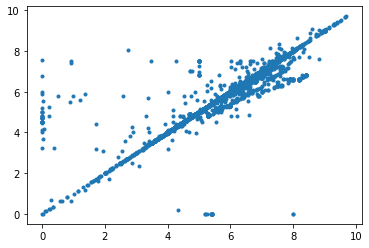

In [231]:
# plot this correlation

plt.figure()
plt.plot(df_train['rougher_input_floatbank11_xanthate'],df_train['rougher_input_floatbank10_xanthate'],'.')

**So...** without any doubth this is y=x. So we can use *rougher_input_floatbank10_xanthate* to fillna in *rougher_input_floatbank11_xanthate*

In [232]:
index_na = df_train['rougher_input_floatbank11_xanthate'].isnull()
df_train.loc[index_na,'rougher_input_floatbank11_xanthate'] = df_train.loc[index_na,'rougher_input_floatbank10_xanthate']

In [233]:
print('We still have',df_train['rougher_input_floatbank11_xanthate'].isnull().sum(),'N/A-values')

We still have 8 N/A-values


**N/A-values: 2 step (rougher_state_floatbank10_e_air)**

In [234]:
# find the best correlation for rougher_state_floatbank10_e_air

df_train[list_removeNan].corr()['rougher_state_floatbank10_e_air'].sort_values(ascending=False)[:5]

rougher_state_floatbank10_e_air    1.000000
rougher_state_floatbank10_f_air    0.940696
rougher_state_floatbank10_d_air    0.884600
rougher_state_floatbank10_b_air    0.830794
rougher_state_floatbank10_c_air    0.779243
Name: rougher_state_floatbank10_e_air, dtype: float64

**Notice:** rougher_state_floatbank10_f_air has very high correlation (0.94). Maybe it is better even exclude such a high correlation (to avoid this zombie-duplicated parameter). But we remain it.

(0, 1750)

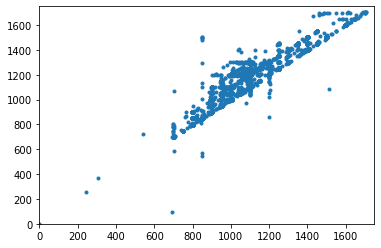

In [235]:
# plot this correlation

plt.figure()
plt.plot(df_train['rougher_state_floatbank10_f_air'],df_train['rougher_state_floatbank10_e_air'],'.')
plt.xlim(0,1750)
plt.ylim(0,1750)

**So...** without any doubth this is y=x. So we can use *rougher_state_floatbank10_f_air* to fillna in *rougher_state_floatbank10_e_air*

In [236]:
index_na = df_train['rougher_state_floatbank10_e_air'].isnull()
df_train.loc[index_na,'rougher_state_floatbank10_e_air'] = df_train.loc[index_na,'rougher_state_floatbank10_f_air']

In [237]:
print('We still have',df_train['rougher_state_floatbank10_e_air'].isnull().sum(),'N/A-values')

We still have 0 N/A-values


**N/A-values: 2 step (secondary_cleaner_state_floatbank2_a_air)**

In [238]:
# find the best correlation for secondary_cleaner_state_floatbank2_a_air

df_train[list_removeNan].corr()['secondary_cleaner_state_floatbank2_a_air'].sort_values(ascending=False)[:5]

secondary_cleaner_state_floatbank2_a_air      1.000000
secondary_cleaner_state_floatbank2_b_air      0.882160
secondary_cleaner_state_floatbank2_b_level    0.545462
secondary_cleaner_state_floatbank2_a_level    0.532005
secondary_cleaner_state_floatbank4_a_air      0.432598
Name: secondary_cleaner_state_floatbank2_a_air, dtype: float64

**Notice:** *secondary_cleaner_state_floatbank2_b_air* has high correlation (0.88).

(0, 40)

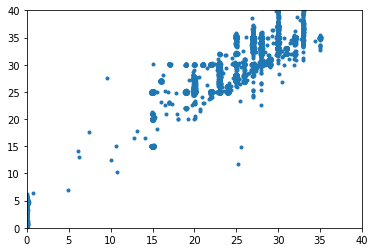

In [239]:
# plot this correlation

plt.figure()
plt.plot(df_train['secondary_cleaner_state_floatbank2_b_air'],df_train['secondary_cleaner_state_floatbank2_a_air'],'.')
plt.xlim(0,40)
plt.ylim(0,40)

In [240]:
# find linear approximation function to calculate <secondary_cleaner_state_floatbank2_a_air>
f = interpolate.interp1d(df_train['secondary_cleaner_state_floatbank2_b_air'],
              df_train['secondary_cleaner_state_floatbank2_a_air'], kind='linear')

In [241]:
index_na = df_train['secondary_cleaner_state_floatbank2_a_air'].isnull()

In [242]:
# I don't understand how to do it in the right-beautifull matrix way; I just go through the cycle

for k in df_train[df_train['secondary_cleaner_state_floatbank2_a_air'].isnull()].index:
    df_train.loc[k,'secondary_cleaner_state_floatbank2_a_air'] = \
        df_train.loc[k,'secondary_cleaner_state_floatbank2_b_air']

In [243]:
print('We still have',df_train['secondary_cleaner_state_floatbank2_a_air'].isnull().sum(),'N/A-values')

We still have 6 N/A-values


**N/A-values: 2 step (rougher_input_feed_pb)**

In [244]:
# find the best correlation for rougher_input_feed_pb

df_train[list_removeNan].corr()['rougher_input_feed_pb'].sort_values(ascending=False)[:5]

rougher_input_feed_pb                1.000000
rougher_input_feed_au                0.691097
primary_cleaner_input_sulfate        0.547225
rougher_input_feed_ag                0.494735
rougher_state_floatbank10_a_level    0.309202
Name: rougher_input_feed_pb, dtype: float64

**Notice:** *rougher_input_feed_au* has high correlation (0.69).

(0, 14)

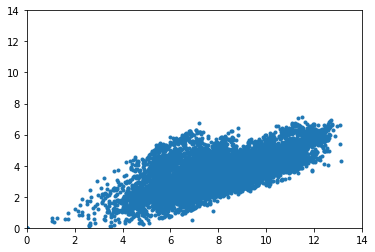

In [245]:
# plot this correlation

plt.figure()
plt.plot(df_train['rougher_input_feed_au'],df_train['rougher_input_feed_pb'],'.')
plt.xlim(0,14)
plt.ylim(0,14)

In [246]:
# find linear approximation function to calculate <rougher_input_feed_pb>
f = interpolate.interp1d(df_train['rougher_input_feed_au'],
              df_train['rougher_input_feed_pb'], kind='linear')

In [247]:
index_na = df_train['rougher_input_feed_pb'].isnull()

In [248]:
# I don't understand how to do it in the right-beautifull matrix way; I just go through the cycle

for k in df_train[df_train['rougher_input_feed_pb'].isnull()].index:
    df_train.loc[k,'rougher_input_feed_pb'] = \
        df_train.loc[k,'rougher_input_feed_au']

In [249]:
print('We still have',df_train['rougher_input_feed_pb'].isnull().sum(),'N/A-values')

We still have 0 N/A-values


In [250]:
# print number of Nan in each feature (what remain)

df_train[list_removeNan].isnull().sum().sort_values(ascending=False)

rougher_input_feed_size                       144
primary_cleaner_input_xanthate                100
rougher_input_feed_sol                         78
rougher_input_floatbank11_sulfate              36
primary_cleaner_input_depressant               32
rougher_input_floatbank10_sulfate              29
secondary_cleaner_state_floatbank2_b_air       21
primary_cleaner_input_sulfate                  20
rougher_input_floatbank10_xanthate              8
rougher_input_feed_rate                         8
rougher_input_floatbank11_xanthate              8
secondary_cleaner_state_floatbank4_a_air        6
secondary_cleaner_state_floatbank2_a_air        6
primary_cleaner_state_floatbank8_b_air          4
primary_cleaner_state_floatbank8_a_air          4
secondary_cleaner_state_floatbank3_a_air        4
primary_cleaner_state_floatbank8_d_air          3
secondary_cleaner_state_floatbank6_a_air        2
primary_cleaner_state_floatbank8_c_air          2
primary_cleaner_state_floatbank8_d_level        1


**N/A-values: 3 step** <br>
I haven't found a good correlation for the rest features. <br>
I could fillna with mean-values, but I don't think that it is a good idea. <br>
We have enough data to remove the rest ~ 400 observations with N/A from ~ 14 000 (about 3%).

In [251]:
# remove the rest N/A-values

df_train = df_train.dropna(subset=list_removeNan)

In [252]:
# check if we correctly fill N/A-values

print('number of N/A-values in features:',df_train[list_removeNan].isnull().sum().sum())

number of N/A-values in features: 0


**0-values (in target):** <br>
We will not obtain a good result of model fitting, if in the train dataset there will be zeros in target, which connected with lost of data

In [253]:
print('Number of 0-values in rougher_output_recovery:',len(df_train.query('rougher_output_recovery == 0')))
print('It is only {:.0%} of dataset'.format(
      len(df_train.query('rougher_output_recovery == 0')) / len(df_train)))

Number of 0-values in rougher_output_recovery: 286
It is only 2% of dataset


In [254]:
df_train = df_train.query('rougher_output_recovery != 0')

**Notice:** that in linear model (I calculated it, but not remain in the code to reduce size of code)<br>
MAE and MSE between predicted and true rougher_output_recovery <br>
MAE (with zeros): 6.21; MAE (without zeros): 3.64 <br>
MSE (with zeros): 155.72; MSE (without zeros): 26.64 <br>
**MSE** decreased rapidly. That means that we removed some outliers of  deviation

In [255]:
print('Number of 0-values in final_output_recovery:',len(df_train.query('final_output_recovery == 0')))
print('It is only {:.1%} of dataset'.format(
      len(df_train.query('final_output_recovery == 0')) / len(df_train)))

# remove 0-values in final_output_recovery
df_train = df_train.query('final_output_recovery != 0')

Number of 0-values in final_output_recovery: 42
It is only 0.3% of dataset


In [256]:
print('Number of 100%-values in final_output_recovery:',len(df_train.query('final_output_recovery == 100.')))
print('It is only {:.1%} of dataset'.format(
      len(df_train.query('final_output_recovery == 100.')) / len(df_train)))

# remove 100%-values in final_output_recovery
df_train = df_train.query('final_output_recovery != 100.')

Number of 100%-values in final_output_recovery: 55
It is only 0.4% of dataset


**Notice:** that in linear model <br>
MAE (with zeros): 5.15; MAE (without zeros): 4.8 <br>
MSE (with zeros): 64.4; MSE (without zeros): 47.9 <br>
MAE between predicted and true final_output_recovery

**in test dataset:** <br>
We can't just dropna in test dataset. Because there are not many N/A-values, we can fillna with median values.

In [257]:
df_test = df_test.fillna(df_test.isnull().mean())

<div class="alert alert-success">
    Wow, very thorough section dealing with missing values! Missing targets were dropped, and for missing features you used very reasonable estimates. In most projects I review people just do something very crude like filling everything with mean, so your approach is very impressive!
</div>

# Summary of Section 1
1. We opened files and take a look on them.
2. We checked that recovery is calculated correctly. We found the observations where there are no values (Nan).
3. MAE is very close to zero. That means that our calculations are very close to those in train dataset.
4. There are no features, which we plan to predict (target), in test dataset.
5. The first data preprocessing has been completed: change of date-type + fill N/A values

# Section 2
2. Analyze the data
- [x] Take note of how the concentrations of metals (Au, Ag, Pb) change depending on the purification stage.
- [x] Compare the feed particle size distributions in the training set and in the test set. If the distributions vary significantly, the model evaluation will be incorrect.
- [x] Consider the total concentrations of all substances at different stages: raw feed, rougher concentrate, and final concentrate. Do you notice any abnormal values in the total distribution? If you do, is it worth removing such values from both samples? Describe the findings and eliminate anomalies.

**- [ ] Take note of how the concentrations of metals (Au, Ag, Pb) change depending on the purification stage.**

In [258]:
# save name of features that contains information about Au, Ag and Pb

au_concentrate_name = ['rougher_input_feed_au',
                        'rougher_output_concentrate_au',
                        'primary_cleaner_output_concentrate_au',
                        'final_output_concentrate_au']

ag_concentrate_name = ['rougher_input_feed_ag',
                        'rougher_output_concentrate_ag',
                        'primary_cleaner_output_concentrate_ag',
                        'final_output_concentrate_ag']

pb_concentrate_name = ['rougher_input_feed_pb',
                        'rougher_output_concentrate_pb',
                        'primary_cleaner_output_concentrate_pb',
                        'final_output_concentrate_pb']


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc3330d4250>,
      dtype=object)

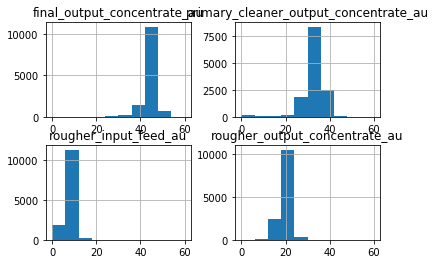

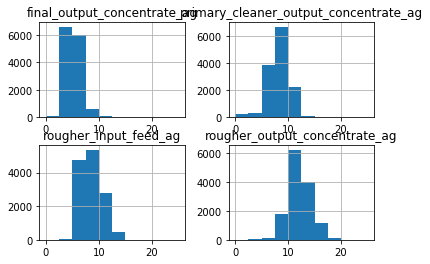

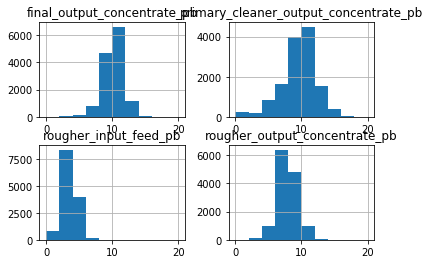

In [259]:
# plot histogram

df_train[au_concentrate_name].hist(range=(0,60))
df_train[ag_concentrate_name].hist(range=(0,25))
df_train[pb_concentrate_name].hist(range=(0,20))

**Notice:**
1. Aurum concentration: it increases step-by-step in each stage (10%-20%-30%-45%)
2. Argentum concentration: it increase after flotation (8%-12%), then decrease (12%-8%-5%)
3. Plumbum concentration: it increase after flotation (4%-8%), after primary filter (8%-10%), in output it still 10%

<div class="alert alert-warning">
    Great! I would only suggest putting all the concentrations of one metal at different stages on one axis for easier comparison.
</div>

<div class="alert alert-info">
    Updated (below).
</div>

<div class="alert alert-success">
    <b>V2.</b>
    Cool, now it's easier to track the changes :)
</div>

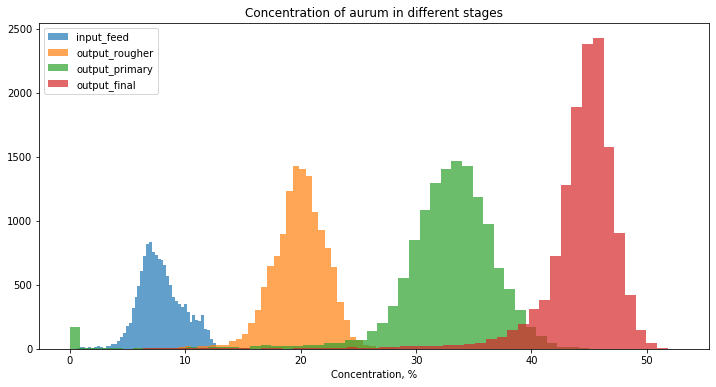

In [260]:
n_bins = 50
const_alpha = 0.7

plt.figure(figsize=(12,6))
plt.hist(df_train['rougher_input_feed_au'], bins=n_bins, alpha=const_alpha, label='input_feed')
plt.hist(df_train['rougher_output_concentrate_au'], bins=n_bins, alpha=const_alpha, label='output_rougher')
plt.hist(df_train['primary_cleaner_output_concentrate_au'], bins=n_bins, alpha=const_alpha, label='output_primary')
plt.hist(df_train['final_output_concentrate_au'], bins=n_bins, alpha=const_alpha, label='output_final')

plt.title('Concentration of aurum in different stages')
plt.xlabel('Concentration, %')
plt.title('Concentration of aurum in different stages')
plt.legend()

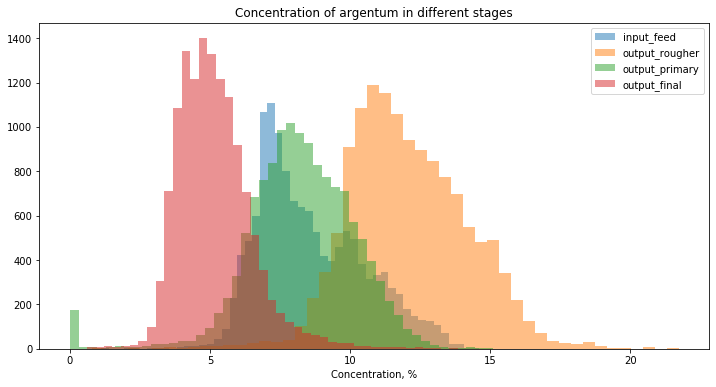

In [261]:
n_bins = 50
const_alpha = 0.5

plt.figure(figsize=(12,6))
plt.hist(df_train['rougher_input_feed_ag'], bins=n_bins, alpha=const_alpha, label='input_feed')
plt.hist(df_train['rougher_output_concentrate_ag'], bins=n_bins, alpha=const_alpha, label='output_rougher')
plt.hist(df_train['primary_cleaner_output_concentrate_ag'], bins=n_bins, alpha=const_alpha, label='output_primary')
plt.hist(df_train['final_output_concentrate_ag'], bins=n_bins, alpha=const_alpha, label='output_final')

plt.title('Concentration of argentum in different stages')
plt.xlabel('Concentration, %')
plt.title('Concentration of argentum in different stages')
plt.legend()

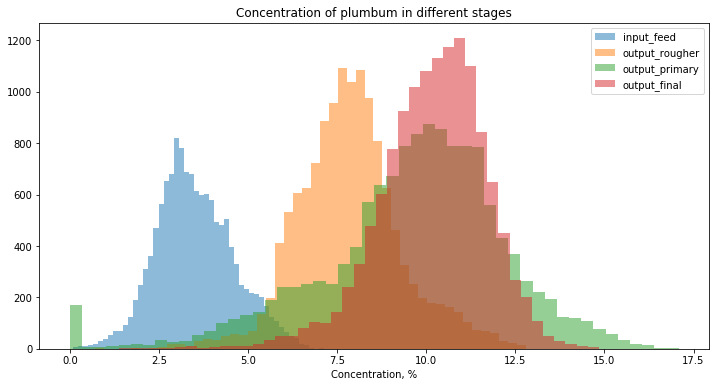

In [262]:
n_bins = 50
const_alpha = 0.5

plt.figure(figsize=(12,6))
plt.hist(df_train['rougher_input_feed_pb'], bins=n_bins, alpha=const_alpha, label='input_feed')
plt.hist(df_train['rougher_output_concentrate_pb'], bins=n_bins, alpha=const_alpha, label='output_rougher')
plt.hist(df_train['primary_cleaner_output_concentrate_pb'], bins=n_bins, alpha=const_alpha, label='output_primary')
plt.hist(df_train['final_output_concentrate_pb'], bins=n_bins, alpha=const_alpha, label='output_final')

plt.title('Concentration of plumbum in different stages')
plt.xlabel('Concentration, %')
plt.title('Concentration of plumbum in different stages')
plt.legend()

**- [ ] Compare the feed particle size distributions in the training set and in the test set. If the distributions vary significantly, the model evaluation will be incorrect.**

Mean value in train dataset: 60.1
Median value in train dataset: 55.5
Standard deviation in train dataset: 22.0
Maximum in train dataset: 485.0


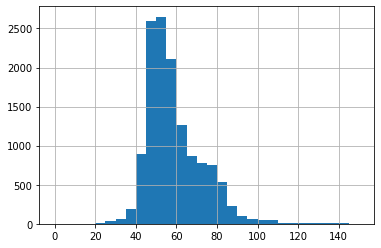

In [263]:
# feed particle size distribution in train dataset

# plot histogram and find mean and standard deviation
# later we plot both histogram in the same figure
df_train['rougher_input_feed_size'].hist(range=(0,150),bins=30)

print('Mean value in train dataset: {:.1f}'.format(df_train['rougher_input_feed_size'].mean()))
print('Median value in train dataset: {:.1f}'.format(df_train['rougher_input_feed_size'].median()))
print('Standard deviation in train dataset: {:.1f}'.format(df_train['rougher_input_feed_size'].std()))
print('Maximum in train dataset: {:.1f}'.format(df_train['rougher_input_feed_size'].max()))

Mean value in train dataset: 55.9
Median value in train dataset: 50.8
Standard deviation in train dataset: 19.1
Maximum in train dataset: 392.5


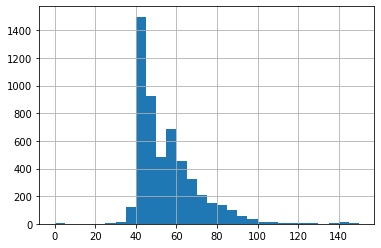

In [264]:
# feed particle size distribution in train dataset

# plot histogram and find mean and standard deviation
# later we plot both histogram in the same figure
df_test['rougher_input_feed_size'].hist(range=(0,150),bins=30)

print('Mean value in train dataset: {:.1f}'.format(df_test['rougher_input_feed_size'].mean()))
print('Median value in train dataset: {:.1f}'.format(df_test['rougher_input_feed_size'].median()))
print('Standard deviation in train dataset: {:.1f}'.format(df_test['rougher_input_feed_size'].std()))
print('Maximum in train dataset: {:.1f}'.format(df_test['rougher_input_feed_size'].max()))

# save u + 3sigma (later filter)
sigma3 = df_train['rougher_input_feed_size'].mean() + 3 * df_train['rougher_input_feed_size'].std()

**So...** mean (60.0 vs 55.9), median (55.3 vs 50.0) and standard deviation (22.4 vs 22.7) differ slightly. <br>

We can filter observations with too high feed particle size (3$\sigma$-criteria)

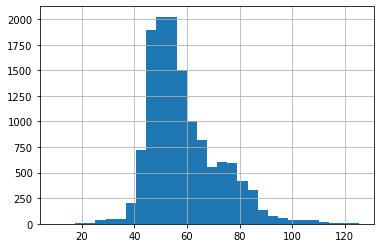

In [265]:
# filter outliers > u + 3sigma
df_train = df_train.query('rougher_input_feed_size <= @sigma3')

# plot updated histogram
df_train['rougher_input_feed_size'].hist(bins=30)

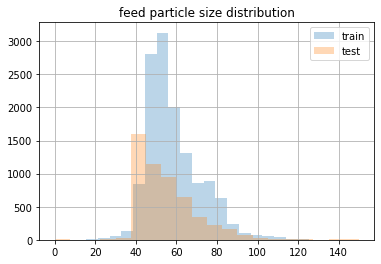

In [266]:
ax = df_train['rougher_input_feed_size'].hist(bins=20, alpha=0.3,label=['train'])
df_test['rougher_input_feed_size'].hist(bins=20, alpha=0.3, ax=ax,label=['test'], range=(0,150))
ax.set_title('feed particle size distribution')
ax.legend()

<div class="alert alert-danger">
    <s>When we compare distributions, histograms should be normalized, otherwise, well done!
</div>

<div class="alert alert-info">
    Updated (below).
</div>

<div class="alert alert-success">
    <b>V2.</b>
    Fixed! 
</div>

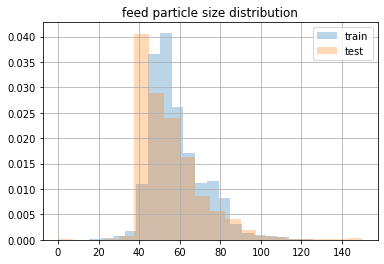

In [267]:
ax = df_train['rougher_input_feed_size'].hist(bins=20, alpha=0.3,label=['train'], density=1)
df_test['rougher_input_feed_size'].hist(bins=20, alpha=0.3, ax=ax,label=['test'], range=(0,150), density=1)
ax.set_title('feed particle size distribution')
ax.legend()

**- [ ] Consider the total concentrations of all substances at different stages: raw feed, rougher concentrate, and final concentrate. Do you notice any abnormal values in the total distribution? If you do, is it worth removing such values from both samples? Describe the findings and eliminate anomalies.**

In [268]:
# raw feed: list of concentration
concentration_raw_feed = ['rougher_input_feed_ag',
       'rougher_input_feed_pb', 'rougher_input_feed_sol',
       'rougher_input_feed_au', 'rougher_input_floatbank10_sulfate',
       'rougher_input_floatbank10_xanthate',
       'rougher_input_floatbank11_sulfate',
       'rougher_input_floatbank11_xanthate']

# raw feed: nulls 
df_train[concentration_raw_feed].isnull().sum()

rougher_input_feed_ag                 0
rougher_input_feed_pb                 0
rougher_input_feed_sol                0
rougher_input_feed_au                 0
rougher_input_floatbank10_sulfate     0
rougher_input_floatbank10_xanthate    0
rougher_input_floatbank11_sulfate     0
rougher_input_floatbank11_xanthate    0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc33268d710>,
      dtype=object)

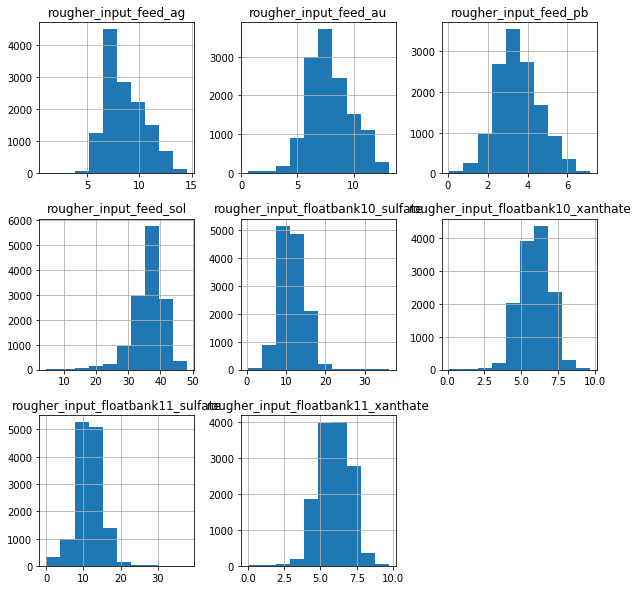

In [269]:
# raw feed: plot histograms
df_train[concentration_raw_feed].hist(figsize=(10,10))

In [270]:
# rougher: list of concentration
concentration_rougher_concentrate = ['rougher_output_concentrate_ag',
       'rougher_output_concentrate_pb', 'rougher_output_concentrate_sol',
       'rougher_output_concentrate_au', 'primary_cleaner_input_sulfate', 'primary_cleaner_input_depressant',
       'primary_cleaner_input_xanthate']

# rougher: nulls 
df_train[concentration_rougher_concentrate].isnull().sum()

rougher_output_concentrate_ag        0
rougher_output_concentrate_pb        0
rougher_output_concentrate_sol      17
rougher_output_concentrate_au        0
primary_cleaner_input_sulfate        0
primary_cleaner_input_depressant     0
primary_cleaner_input_xanthate       0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc332313810>,
      dtype=object)

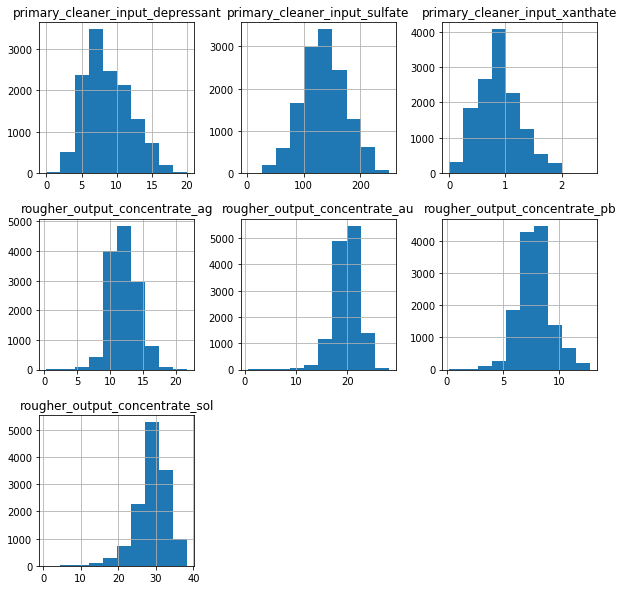

In [271]:
# rougher: plot histograms
df_train[concentration_rougher_concentrate].hist(figsize=(10,10))

In [272]:
# final: list of concentration
concentration_final = ['final_output_concentrate_ag', 'final_output_concentrate_pb',
       'final_output_concentrate_sol', 'final_output_concentrate_au']

# final: nulls 
df_train[concentration_final].isnull().sum()

final_output_concentrate_ag       1
final_output_concentrate_pb       1
final_output_concentrate_sol    192
final_output_concentrate_au       0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc33296fc10>,
      dtype=object)

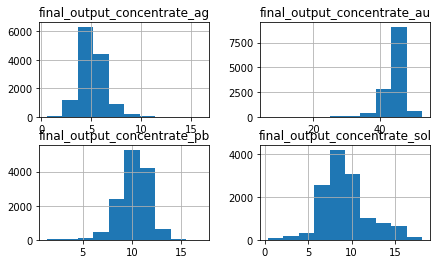

In [273]:
# final: plot histograms
df_train[concentration_final].hist(figsize=(7,4))

In [274]:
# as we predict final recovery, we should drop N/A values in _au_, _ag_, _pb_ 
# only 4-5 observations with N/A-values, so we can drop it without any negative consequences

df_train = df_train.dropna(subset=['final_output_concentrate_ag',
                               'final_output_concentrate_pb', 'final_output_concentrate_au'])

<div class="alert alert-danger">
    <s>Not quite what the task meant; you are supposed to consider each stage, and sum the concentrations of all metals at that stage, and then look at the distributions
</div>

<div class="alert alert-info">
    Updated (below).
</div>

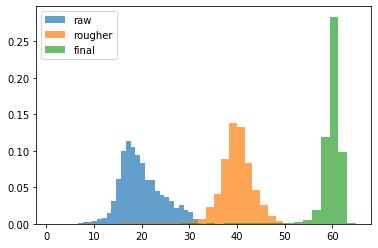

In [275]:
# calculate the total concentrations of all substances at different stages

total_raw_feed = df_train['rougher_input_feed_au'] + \
                    df_train['rougher_input_feed_ag'] + \
                    df_train['rougher_input_feed_pb']

total_rougher = df_train['rougher_output_concentrate_au'] + \
                    df_train['rougher_output_concentrate_ag'] + \
                    df_train['rougher_output_concentrate_pb']

total_final = df_train['final_output_concentrate_au'] + \
                    df_train['final_output_concentrate_ag'] + \
                    df_train['final_output_concentrate_pb']

plt.figure()
plt.hist(total_raw_feed, bins=30, alpha=0.7, label='raw', density=1)
plt.hist(total_rougher, bins=30, alpha=0.7, label='rougher', density=1)
plt.hist(total_final, bins=30, alpha=0.7, label='final', density=1)
plt.legend()

<div class="alert alert-info">
    <b>Notice...</b> <br>
    1. We have already done data preprocessing, so we don't see zero-values. Although they were in both datasets. <br>
    2. So, total concentration is great than zero. <br>
    3. Distributions become narrower after each stage. That's mean that each stage is highly important. Distributions without doubts differ from each other.
</div>

<div class="alert alert-success">
    <b>V2.</b>
    Very good, that makes sense!
</div>

# Summary of Section 2
1. We have analyzed the data after preprocessing.
2. We investigate how changes different concentration.

# Section 3
3. Build the model
- [x] Write a function to calculate the final sMAPE value.
- [x] Train different models. Evaluate them using cross-validation. Pick the best model and test it using the test sample. Provide findings.

**- [ ] Write a function to calculate the final sMAPE value.**

<img src="https://pictures.s3.yandex.net/resources/smape_1576238825_1589899257.jpg" alt="Drawing" style="width: 400px;"/>
where: <br>
yi is value of target for the observation with the i index in the sample used to measure quality. <br>
y^i is value of prediction for the observation with the i index, for example, in the test sample. <br>
N is number of observations in the sample. <br>
<img src="https://pictures.s3.yandex.net/resources/_smape_1589899561.jpg" alt="Drawing" style="width: 400px;"/>

In [276]:
# calculate sMAPE
def sMAPE(y_true, y_pred):
    if len(y_true) == 0:
        print('N should be great than 0')
        return
    
    sum_i = 0
    for k in range(len(y_true)):
        if abs(y_true[k]) + abs(y_pred[k]) == 0:
            print('abs(y_true[k]) + abs(y_pred[k]) should be great than 0')
        else:
            sum_i += 2.0 * abs(y_true[k] - y_pred[k]) / (abs(y_true[k]) + abs(y_pred[k]))
    
    return sum_i * 100. / len(y_true)

# calculate final sMAPE
def finalsMAPE(y_true_rougher0_final1, y_pred_rougher0_final1):
    return 0.25 * sMAPE(y_true_rougher0_final1.values[:,0], y_pred_rougher0_final1[:,0]) + \
                0.75 * sMAPE(y_true_rougher0_final1.values[:,1], y_pred_rougher0_final1[:,1])

<div class="alert alert-success">
    SMAPE function is correct!
</div>

**- [ ] Train different models. Evaluate them using cross-validation. Pick the best model and test it using the test sample. Provide findings.**

In [277]:
# save list of columns which are in both train and test model, exclude date

list_features_name = []
for item in df_train.columns:
    if not('output' in item) and (not('calculation' in item)) and item != 'date':
        list_features_name.append(item)
   
list_target_name = ['rougher_output_recovery', 'final_output_recovery']

<div class="alert alert-warning">
    Would be easier to just intersect the columns of train and test, but alright :)
</div>

<div class="alert alert-info">
    ah, I have merged test dataset with final.. So, I can't just inersect the columns. But it is really good idea. <br>
    In stackoverfklow there is interesting way to do it <br> list(set(a) & set(b))
</div>

<div class="alert alert-warning">
    <b>V2.</b>
    One possible solution is to intersect them before merging and save the result :)
</div>

In [278]:
# define train and test datasets

features_train = df_train[list_features_name]
target_train = df_train[list_target_name]

features_test = df_test[list_features_name]
target_test = df_test[list_target_name]

In [279]:
# learn the model (on)

# normal
model = LinearRegression()
model.fit(features_train, target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [280]:
# predicted_rougher_recovery, predicted_final_recovery

# normal
prediction_train = model.predict(features_train)
predicted_rougher_recovery = prediction_train[:,0]
predicted_final_recovery = prediction_train[:,1]

true_rougher_recovery = target_train['rougher_output_recovery']
true_final_recovery = target_train['final_output_recovery']

**rougher_output_recovery: itself**

Text(0.5, 1.0, 'rougher_recovery vs calculated rougher_recovery')

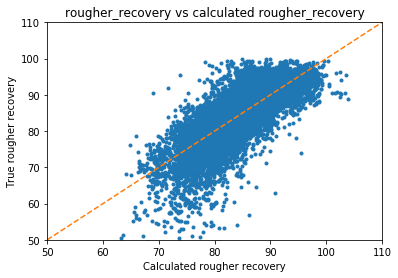

In [281]:
plt.plot(predicted_rougher_recovery, df_train['rougher_output_recovery'],'.')
plt.plot([50, 110], [50, 110], linestyle='--')
plt.xlim(50,110)
plt.ylim(50,110)
plt.xlabel("Calculated rougher recovery")
plt.ylabel("True rougher recovery")
plt.title("rougher_recovery vs calculated rougher_recovery")

**So..** the result of prediction looks promisingly

In [282]:
print('rougher_output_recovery MAE: {:.1f}'.format(
                    mean_absolute_error(df_train['rougher_output_recovery'].values, predicted_rougher_recovery) ))
print('rougher_output_recovery MSE: {:.1f}'.format(
                    mean_squared_error(df_train['rougher_output_recovery'].values, predicted_rougher_recovery) ))
print('rougher_output_recovery sMAPE: {:.1f}%'.format(
                    sMAPE(df_train['rougher_output_recovery'].values, predicted_rougher_recovery) ))

rougher_output_recovery MAE: 3.6
rougher_output_recovery MSE: 26.1
rougher_output_recovery sMAPE: 4.5%


**final_output_recovery: itself**

Text(0.5, 1.0, 'Final recovery vs calculated final recovery')

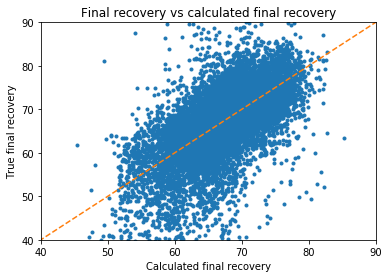

In [283]:
plt.plot(predicted_final_recovery, df_train['final_output_recovery'],'.')
plt.plot([0, 110], [0, 110], linestyle='--')
plt.xlim(40,90)
plt.ylim(40,90)
plt.xlabel("Calculated final recovery")
plt.ylabel("True final recovery")
plt.title("Final recovery vs calculated final recovery")

**So..** the result of prediction looks promisingly too

In [284]:
print('rougher_output_recovery MAE: {:.1f}'.format(
                    mean_absolute_error(df_train['final_output_recovery'].values, predicted_final_recovery) ))
print('rougher_output_recovery MSE: {:.1f}'.format(
                    mean_squared_error(df_train['final_output_recovery'].values, predicted_final_recovery) ))
print('rougher_output_recovery sMAPE: {:.1f}%'.format(
                    sMAPE(df_train['final_output_recovery'].values, predicted_final_recovery) ))

rougher_output_recovery MAE: 4.8
rougher_output_recovery MSE: 47.9
rougher_output_recovery sMAPE: 7.6%


**final_output_recovery & rougher_output_recovery: metrics sMAPE**

In [285]:
#finalsMAPE(y_true_rougher0_final1, y_pred_rougher0_final1)

print('finalsMAPE of train test: {:.2f}%'.format(
            finalsMAPE(target_train, prediction_train) ))

finalsMAPE of train test: 6.82%


**cross-validation**

In [286]:
finalsMAPE_score = make_scorer(finalsMAPE)

In [287]:
print('cross-validation finalsMAPE of train test: {:.2f}%'.format(
            cross_val_score(model, features_train, target_train, cv=5, scoring=finalsMAPE_score).mean() ))

cross-validation finalsMAPE of train test: 9.23%


**model: Random Forest**

In [288]:
# scale feature in train and test datasets

scaler = StandardScaler()
scaler.fit(features_train) 
features_train_scaled = scaler.transform(features_train)
features_test_scaled = scaler.transform(features_test) 

<div class="alert alert-warning">
    Scaling isn't really necessary for tree-based models
</div>

<div class="alert alert-info">
    OK. I don't understand why right now. I need read something about it later. <br>
</div>

<div class="alert alert-warning">
    <b>V2.</b>
    See <a href='https://sebastianraschka.com/faq/docs/when-to-standardize.html'>here</a> or <a href='https://ai.stackexchange.com/questions/22307/why-are-decision-trees-and-random-forests-scale-invariant'>here</a>. Basically tree-based models are invariant to scaling. Although it wouldn't hurt either, so no harm done! :)
</div>

In [289]:
# fit model

model_forest = RandomForestRegressor(max_depth=3, n_estimators=3, random_state=12345)
model_forest.fit(features_train_scaled, target_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=3, n_jobs=None,
                      oob_score=False, random_state=12345, verbose=0,
                      warm_start=False)

In [290]:
# predict train

prediction_train_scaled = model_forest.predict(features_train_scaled)
predicted_rougher_recovery = prediction_train_scaled[:,0]
predicted_final_recovery = prediction_train_scaled[:,1]

true_rougher_recovery = target_train['rougher_output_recovery']
true_final_recovery = target_train['final_output_recovery']

**rougher_output_recovery: itself**

Text(0.5, 1.0, 'rougher_recovery vs calculated rougher_recovery')

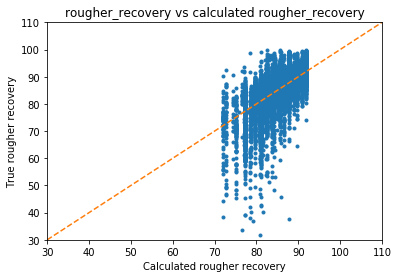

In [291]:
plt.plot(predicted_rougher_recovery, df_train['rougher_output_recovery'],'.')
plt.plot([30, 110], [30, 110], linestyle='--')
plt.xlim(30,110)
plt.ylim(30,110)
plt.xlabel("Calculated rougher recovery")
plt.ylabel("True rougher recovery")
plt.title("rougher_recovery vs calculated rougher_recovery")

**So..** the result of prediction looks promisingly

In [292]:
print('rougher_output_recovery MAE: {:.1f}'.format(
                    mean_absolute_error(df_train['rougher_output_recovery'].values, predicted_rougher_recovery) ))
print('rougher_output_recovery MSE: {:.1f}'.format(
                    mean_squared_error(df_train['rougher_output_recovery'].values, predicted_rougher_recovery) ))
print('rougher_output_recovery sMAPE: {:.1f}%'.format(
                    sMAPE(df_train['rougher_output_recovery'].values, predicted_rougher_recovery) ))

rougher_output_recovery MAE: 3.9
rougher_output_recovery MSE: 31.4
rougher_output_recovery sMAPE: 4.8%


**final_output_recovery: itself**

Text(0.5, 1.0, 'Final recovery vs calculated final recovery')

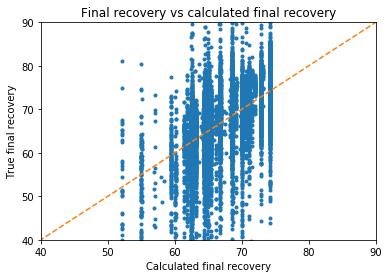

In [293]:
plt.plot(predicted_final_recovery, df_train['final_output_recovery'],'.')
plt.plot([0, 110], [0, 110], linestyle='--')
plt.xlim(40,90)
plt.ylim(40,90)
plt.xlabel("Calculated final recovery")
plt.ylabel("True final recovery")
plt.title("Final recovery vs calculated final recovery")

**So..** the result of prediction looks promisingly too

<div class="alert alert-warning">
    It would be more interesting to look at such plots for test set predictions
</div>

<div class="alert alert-info">
    Done after calculatons on test dataset. <br>
</div>

In [294]:
print('rougher_output_recovery MAE: {:.1f}'.format(
                    mean_absolute_error(df_train['final_output_recovery'].values, predicted_final_recovery) ))
print('rougher_output_recovery MSE: {:.1f}'.format(
                    mean_squared_error(df_train['final_output_recovery'].values, predicted_final_recovery) ))
print('rougher_output_recovery sMAPE: {:.1f}%'.format(
                    sMAPE(df_train['final_output_recovery'].values, predicted_final_recovery) ))

rougher_output_recovery MAE: 5.0
rougher_output_recovery MSE: 53.4
rougher_output_recovery sMAPE: 7.9%


**final_output_recovery & rougher_output_recovery: metrics sMAPE**

In [295]:
#finalsMAPE(y_true_rougher0_final1, y_pred_rougher0_final1)

print('finalsMAPE of train test: {:.2f}%'.format(
            finalsMAPE(target_train, prediction_train_scaled) ))

finalsMAPE of train test: 7.15%


**cross-validation**

In [296]:
print('cross-validation finalsMAPE of train test: {:.2f}%'.format(
            cross_val_score(model_forest, features_train_scaled, target_train, cv=5, scoring=finalsMAPE_score).mean() ))

cross-validation finalsMAPE of train test: 8.42%


**So...** even without the parameter tuning it gives better result finalsMAPE (8.42%) vs LinearModel (9.23%)

In [297]:
# scores_random = []
# best_parameters = []
# minimal_MAPE = -999
# for step_max_depth in range(3,6,1):
#     for step_n_estim in range(5,60,5):
#         model_forest = RandomForestRegressor(max_depth=step_max_depth,
#                                              n_estimators=step_n_estim,
#                                              random_state=12345)
#         model_forest.fit(features_train_scaled, target_train)
        
#         prediction_train_scaled = model_forest.predict(features_train_scaled)
#         predicted_rougher_recovery = prediction_train_scaled[:,0]
#         predicted_final_recovery = prediction_train_scaled[:,1]

#         score_i = cross_val_score( model_forest, features_train_scaled,
#                                   target_train, cv=5,
#                                   scoring=finalsMAPE_score).mean() 
        
#         scores_random.append([step_max_depth, step_n_estim, score_i])
        
#         if minimal_MAPE < score_i:
#             best_parameters = [step_max_depth, step_n_estim, score_i]

In [298]:
# print(best_parameters)

In [299]:
# check if it is correct

model_forest = RandomForestRegressor(max_depth=4,
                                     n_estimators=5,
                                     random_state=12345)
model_forest.fit(features_train_scaled, target_train)

prediction_train_scaled = model_forest.predict(features_train_scaled)
predicted_rougher_recovery = prediction_train_scaled[:,0]
predicted_final_recovery = prediction_train_scaled[:,1]

print('cross-validation finalsMAPE of train test: {:.2f}%'.format(
            cross_val_score(model_forest, features_train_scaled, target_train, cv=5, scoring=finalsMAPE_score).mean() ))

cross-validation finalsMAPE of train test: 8.21%


**So...** after tuning finalsMAPE is 8.21% vs without tuning (8.42%)

**apply to test dataset**

In [300]:
# predicted test
prediction_test_scaled = model_forest.predict(features_test_scaled)
predicted_rougher_recovery = prediction_test_scaled[:,0]
predicted_final_recovery = prediction_test_scaled[:,1]

print('finalsMAPE of train test: {:.2f}%'.format(
            finalsMAPE(target_test, prediction_test_scaled) ))

finalsMAPE of train test: 9.72%


In [301]:
len(target_test)

5290

<div class="alert alert-info">
    Plot test dataset. <br>
</div>

Text(0.5, 1.0, 'Rougher recovery vs calculated rougher recovery')

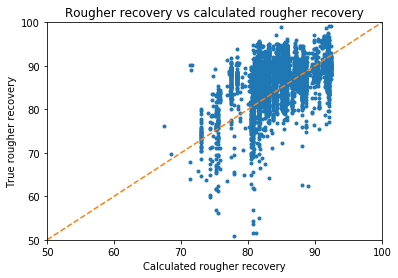

In [302]:
plt.plot(predicted_rougher_recovery, df_test['rougher_output_recovery'],'.')
plt.plot([50, 110], [50, 110], linestyle='--')
plt.xlim(50,100)
plt.ylim(50,100)
plt.xlabel("Calculated rougher recovery")
plt.ylabel("True rougher recovery")
plt.title("Rougher recovery vs calculated rougher recovery")

Text(0.5, 1.0, 'Final recovery vs calculated final recovery')

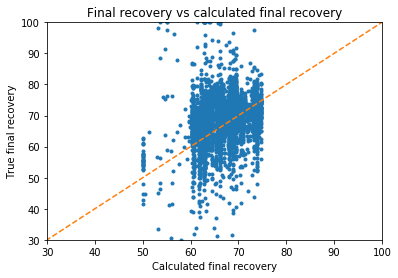

In [303]:
plt.plot(predicted_final_recovery, df_test['final_output_recovery'],'.')
plt.plot([0, 110], [0, 110], linestyle='--')
plt.xlim(30,100)
plt.ylim(30,100)
plt.xlabel("Calculated final recovery")
plt.ylabel("True final recovery")
plt.title("Final recovery vs calculated final recovery")

<div class="alert alert-info">
    In my opinion this result is far from the excellent. We see a lot of points, which are far from the center of this figure. <br>
    (1) When I studied the dataset I noticed some patterns: before the observations where concetration of substance is zero, there are observations (rows) with a slow decrease of this concentration. It should somehow influence on the output parameters. I haven't filter them because of deadline :)<br>
    (2) I think we could try to group (classify) rougher recovery. We can see in the plot that when calculated rougher recovery is under 80%, we systematically give an error result. Systematical error is a good sign to find a place, that we can improve.<br>
    (3) I have forgotten how, but it is really interesting to plot weigh-plot figures. We could know how distribute our results. Now it is just a lot of point on figure (we don't know the density). I'll check it later.<br>
</div>

<div class="alert alert-warning">
    <b>V2.</b>
    Yeah, looks worse than the train set predictions. The problem with trying to classify recovery before regression is that it's not really easier than just doing a regression directly, and can lead to compound error (i.e. if we mispredict the group recovery value falls in, it may lead to even bigger regression error)
</div>

<div class="alert alert-info">
    Thank you for the link on dummyregressor. I even didn't know about it.
</div>

<div class="alert alert-success">
    <b>V2.</b>
    No problem! There's a lot of useful stuff in scikit-learn somewhere :)
</div>

In [304]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(features_train_scaled, target_train)
prediction_test_scaled = dummy_regr.predict(features_test_scaled)

predicted_rougher_recovery = prediction_test_scaled[:,0]
predicted_final_recovery = prediction_test_scaled[:,1]

Text(0.5, 1.0, 'Rougher recovery vs calculated rougher recovery')

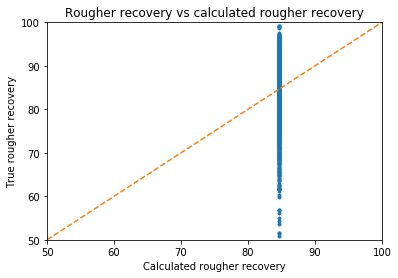

In [305]:
plt.plot(predicted_rougher_recovery, df_test['rougher_output_recovery'],'.')
plt.plot([50, 110], [50, 110], linestyle='--')
plt.xlim(50,100)
plt.ylim(50,100)
plt.xlabel("Calculated rougher recovery")
plt.ylabel("True rougher recovery")
plt.title("Rougher recovery vs calculated rougher recovery")

Text(0.5, 1.0, 'Final recovery vs calculated final recovery')

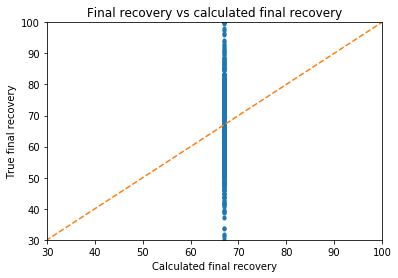

In [306]:
plt.plot(predicted_final_recovery, df_test['final_output_recovery'],'.')
plt.plot([0, 110], [0, 110], linestyle='--')
plt.xlim(30,100)
plt.ylim(30,100)
plt.xlabel("Calculated final recovery")
plt.ylabel("True final recovery")
plt.title("Final recovery vs calculated final recovery")

In [307]:
prediction_train_scaled = dummy_regr.predict(features_train_scaled)

# predicted test
print('finalsMAPE of test dataset (mean Dummy): {:.2f}%'.format(
            finalsMAPE(target_test, prediction_test_scaled) ))
# predicted train
print('finalsMAPE of train dataset (median Dummy): {:.2f}%'.format(
            finalsMAPE(target_train, prediction_train_scaled) ))

finalsMAPE of test dataset (mean Dummy): 9.77%
finalsMAPE of train dataset (median Dummy): 9.11%


In [308]:
dummy_regr = DummyRegressor(strategy="median")
dummy_regr.fit(features_train_scaled, target_train)
prediction_train_scaled = dummy_regr.predict(features_train_scaled)
prediction_test_scaled = dummy_regr.predict(features_test_scaled)

predicted_rougher_recovery = prediction_test_scaled[:,0]
predicted_final_recovery = prediction_test_scaled[:,1]

# predicted test
print('finalsMAPE of test dataset (median Dummy): {:.2f}%'.format(
            finalsMAPE(target_test, prediction_test_scaled) ))
# predicted train
print('finalsMAPE of train dataset (median Dummy): {:.2f}%'.format(
            finalsMAPE(target_train, prediction_train_scaled) ))

finalsMAPE of test dataset (median Dummy): 9.40%
finalsMAPE of train dataset (median Dummy): 9.07%


<div class="alert alert-info">
    <b>So...</b> <br>
    DummyRegressor mean: train finalsMAPE 9.11%, test finalsMAPE 9.77% <br>
    DummyRegressor median: train finalsMAPE 9.07%, test finalsMAPE 9.40% <br>
    Random forest: train finalsMAPE 8.21%, test finalsMAPE 9.72% <br>
    In fact on test dataset DummyRegressor median is the best. But in total it is worse than RandomForest. <br>
    It was really unexpectedly.
</div>

<div class="alert alert-warning">
    <b>V2.</b>
    Yeah, but we only really care about the test scores, as the test score is our best possible estimate of how model performs on new unseen data. And a sufficiently complex model can easily memorize the whole train set and get perfect scores. When a test score is worse than a train score, that indicates <a href='https://en.wikipedia.org/wiki/Overfitting'>overfitting</a>. In our case it seems that either the data is faulty, or maybe there isn't really any non-trivial relationship to learn from it, and something simple can work as well as any fancy machine learning model. Don't worry, I believe that's an intended outcome of this project :)
</div>

# Summary of Section 3
1. We developed different models to predict gold after final and recovery stages.
2. The best models is random forest (finalsMAPE is 8.21%) vs linear model (9.23%)
3. On dataset finalsMAPE is 9.72%. It is worse then in train dataset because we haven't filtered the test dataset. Should we filter it or not it is depends on a business task. Maybe we should give prediction for every observations. 

<div class="alert alert-danger">
    <s>The modelling section is great: you tried two models and did some hyperparameter tuning for the random forest. One small problem: you need to add a constant baseline model (e.g. always predicting mean or median, see DummyRegressor from sklearn)
</div>

<div class="alert alert-success">
    <b>V2.</b>
    Fixed!
</div>

# Conclusion
1. We developed a model based on random forest, which finalsMAPE is 8.21% on train dataset and 9.72% on test dataset.
2. I know that we can improve model if we analyze what parameters we could remove from prediction. In fact some of them have very high correlations up to 0.9.
3. It is a pity that we can't use our metrics in random forest. It is obvious that we should pay more attention on final concentration. Now in our work we treated recovery and final stages the same.
4. This task was really interesting and more challenging than others.

<div class="alert alert-warning">
    Could you explain what you mean by the third point? What metrics we can't use with random forest?
</div>

<div class="alert alert-info">
    I mean that in random forest there is no any difference between final concentration and rough concentration. The model learn to be the best in estimation both of them. But in fact finalsMAPE = 0.25[rough] + 0.75[final]. That means that we should be more accurate in prediction of final output, not rough. Do I correctly understand, how does random forest works? <br>    
</div>

<div class="alert alert-success">
    <b>V2.</b>
    Oh, okay, I see. Yes, you are right!
</div>